# **Linear Regression**

Here we'll load the california housing dataset from sklearn's datasets directory and implement simple linear regression and multiple linear regression on it.

## 1. Importing Data

In [69]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [70]:
data = fetch_california_housing()
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

The data obtained is in the form of dictionary. Let's explore the keys.

In [71]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [72]:
data.DESCR.split("\n")

['.. _california_housing_dataset:',
 '',
 'California Housing dataset',
 '--------------------------',
 '',
 '**Data Set Characteristics:**',
 '',
 ':Number of Instances: 20640',
 '',
 ':Number of Attributes: 8 numeric, predictive attributes and the target',
 '',
 ':Attribute Information:',
 '    - MedInc        median income in block group',
 '    - HouseAge      median house age in block group',
 '    - AveRooms      average number of rooms per household',
 '    - AveBedrms     average number of bedrooms per household',
 '    - Population    block group population',
 '    - AveOccup      average number of household members',
 '    - Latitude      block group latitude',
 '    - Longitude     block group longitude',
 '',
 ':Missing Attribute Values: None',
 '',
 'This dataset was obtained from the StatLib repository.',
 'https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html',
 '',
 'The target variable is the median house value for California districts,',
 'expressed in hundreds

When you load data from sklearn it has multiple attributes. The data is store within data.data and column headers are in data.feature_names. Let's make a dataframe out of these.

In [73]:
data.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [74]:
data.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [75]:
df = pd.DataFrame(data.data, columns = data.feature_names)

In [76]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [77]:
df.head(20)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25


We can see that there is no target variable here. It must be in the target key.

In [78]:
data.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [79]:
df['Target'] = data.target
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


## 2. Implementing Simple Linear Regressions

🏠 `MedInc` – *Median Income*

* **Unit**: *in tens of thousands of dollars* (USD)
* So:

  * `MedInc = 1.0` → \$10,000
  * `MedInc = 8.3252` → \~\$83,252

---

🎯 `target` – *MedHouseVal* (Median House Value)

* **Unit**: *in hundreds of thousands of dollars* (USD)
* So:

  * `target = 2.5` → \$250,000
  * `target = 4.526` → \~\$452,600

---

ℹ️ Source

This dataset was originally derived from the 1990 U.S. Census for California housing values. The documentation confirms:

* [sklearn docs for `fetch_california_housing`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html) mention:

  > "The target variable is the **median house value for California districts, expressed in hundreds of thousands of dollars**."



In [80]:
x = df[['MedInc']]
y = df['Target']

In [81]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

✅ `test_size`

This controls **how much of your dataset is reserved for testing**.

* It’s a fraction (float between 0 and 1) or an absolute integer.
* For example:

  * `test_size=0.2` → 20% of data goes into test set, 80% into training.
  * `test_size=100` → exactly 100 samples in test set.

Why is this needed?

To evaluate how well your model generalizes to **unseen data**, you **don’t train on all the data** — you reserve some for testing.

---
✅ `random_state`

This controls the **random splitting** of data.

* It’s a seed number to make the split **reproducible**.
* Same `random_state` = same split every time you run the code.
* If you leave it out, the data will be split randomly **each time**, which can give different results.

Example:

```python
train_test_split(x, y, test_size=0.2, random_state=42)
```

This ensures:

* 80% training, 20% testing.
* The same 80–20 split **every time you run the code**.

---

Analogy:

* `test_size` is like deciding **how many cookies to keep aside for tasting**.
* `random_state` is like setting a **specific recipe step** to ensure your friend can **reproduce your batch exactly**.



In [82]:
x_train

,MedInc
14196,3.2596
8267,3.8125
17445,4.1563
14265,1.9425
2271,3.5542
...,...
11284,6.3700
11964,3.0500
5390,2.9344
860,5.7192


In [83]:
x_test

,MedInc
20046,1.6812
3024,2.5313
15663,3.4801
20484,5.7376
9814,3.7250
...,...
15362,4.6050
16623,2.7266
18086,9.2298
2144,2.7850


In [84]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [85]:
model._estimator_type

'regressor'

In [86]:
model.coef_

array([0.41933849])

In [87]:
model.coef_[0]

0.4193384939381274

In [88]:
model.intercept_

0.44459729169078677

In [89]:
print("Slope (coefficient):", model.coef_[0])
print("Intercept:", model.intercept_)

Slope (coefficient): 0.4193384939381274
Intercept: 0.44459729169078677


In [90]:
y_pred = model.predict(x_test)

In [91]:
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

MSE: 0.7091157771765548
MAE: 0.629908653009376
R² Score: 0.45885918903846656


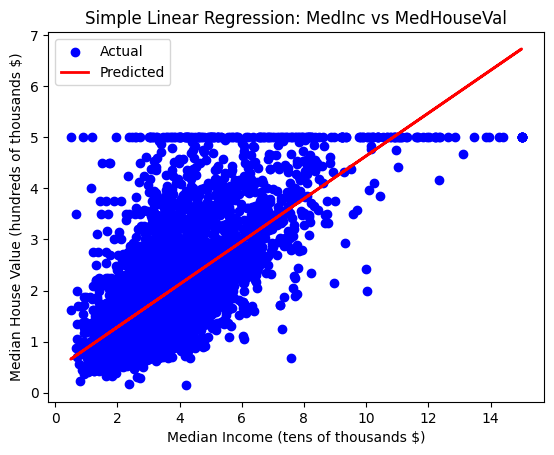

In [92]:
plt.scatter(x_test, y_test, color='blue', label='Actual')
plt.plot(x_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Median Income (tens of thousands $)')
plt.ylabel('Median House Value (hundreds of thousands $)')
plt.title('Simple Linear Regression: MedInc vs MedHouseVal')
plt.legend()
plt.show()

## 3. Implementing Multi Linear Regressions

In [93]:
print(df.columns)

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'Target'],
      dtype='object')


In [94]:
multi_y = df['Target']
multi_x = df.drop('Target', axis=1)

In [95]:
multi_x

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [96]:
multi_x_train, multi_x_test, multi_y_train, multi_y_test = train_test_split(multi_x, multi_y, test_size = 0.2, random_state=42)

In [97]:
model = LinearRegression()
model.fit(multi_x_train, multi_y_train)

LinearRegression()

In [98]:
print(f"Slope (coefficient): {model.coef_[0]}")

Slope (coefficient): 0.4486749096657177


In [99]:
print(f"Intercept: {model.intercept_}")

Intercept: -37.023277706064064


In [100]:
y_prediction = model.predict(multi_x_test)
print(f"MSE: {mean_squared_error(multi_y_test, y_prediction)}")
print(f"MAE: {mean_absolute_error(multi_y_test, y_prediction)}")
print(f"R^2 Score: {r2_score(multi_y_test, y_prediction)}")

MSE: 0.555891598695244
MAE: 0.5332001304956558
R^2 Score: 0.5757877060324511


In [101]:
coeff_df = pd.DataFrame(model.coef_, multi_x.columns, columns=['Coefficient'])
print(coeff_df)

            Coefficient
MedInc         0.448675
HouseAge       0.009724
AveRooms      -0.123323
AveBedrms      0.783145
Population    -0.000002
AveOccup      -0.003526
Latitude      -0.419792
Longitude     -0.433708


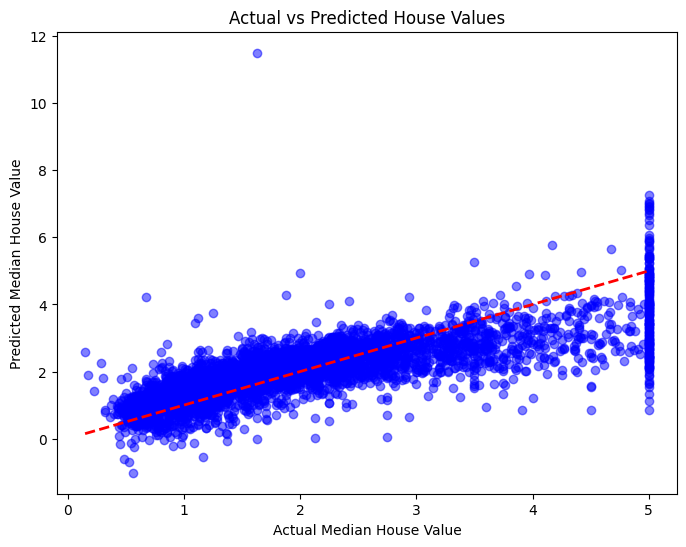

In [102]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(multi_y_test, y_prediction, alpha=0.5, color='blue')
plt.plot([multi_y_test.min(), multi_y_test.max()], [multi_y_test.min(), multi_y_test.max()], 'r--', lw=2)  # diagonal line
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Actual vs Predicted House Values")
plt.show()

## 4. Applying Ridge and Lasso regularization